In [1]:
import torch
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import skimage
%matplotlib inline

In [7]:
conv = nn.ConvTranspose2d(2, 1, 3, stride=3, bias=0)
conv.weight = torch.nn.Parameter(torch.ones(2,1,3,3))
x = torch.zeros(1, 2, 2, 2)
x[0,0,0,0] = 1
x[0,1,1,0] = 0
x[0,0,1,1] = 0
x[0,1,1,1] = 0
out = conv(x)
print(out)
print(out.size())

tensor([[[[1., 1., 1., 0., 0., 0.],
          [1., 1., 1., 0., 0., 0.],
          [1., 1., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]]]], grad_fn=<ThnnConvTranspose2DBackward>)
torch.Size([1, 1, 6, 6])


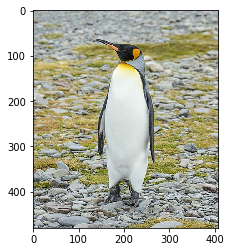

In [28]:
im = Image.open('penguin.jpg')
plt.imshow(im)

In [48]:
original_im = torchvision.transforms.ToTensor()(im)
target = torch.unsqueeze(original_im, 0)
target.size()

torch.Size([1, 3, 480, 409])

In [80]:
original_im = np.asarray(im)
print(original_im.shape)
f_size = 100
filters = skimage.util.view_as_blocks(original_im[:2*f_size,:2*f_size,:], (f_size, f_size, 3))
print(filters.shape)
filters = filters.reshape(-1,100,100,3)
cropped = np.squeeze(filters[1,:,:,:])
f = torch.Tensor(filters)
torch.unsqueeze(f, 1).size()

(480, 409, 3)
(2, 2, 1, 100, 100, 3)


/home/justin/code/sumie/venv/lib/python3.6/site-packages/skimage/util/shape.py:94: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


torch.Size([4, 1, 100, 100, 3])